In [ ]:
!pip install ninja
!pip install tensorboardX
!git clone https://github.com/levindabhi/ACGPN.git
%cd ACGPN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 2.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 9.2 MB/s eta 0:00:00
Cloning into 'ACGPN'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 161 (delta 20), reused 18 (delta 18), pack-reused 139
Receiving objects: 100% (161/161), 302.85 KiB | 16.83 MiB/s, done.
Resolving deltas: 100% (59/59), done.
/content/ACGPN


In [ ]:
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys

from predict_pose import generate_pose_keypoints

In [ ]:
'''
gdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)
%cd Data_preprocessing
!unzip data
%cd ..
'''

"\ngdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)\n%cd Data_preprocessing\n!unzip data\n%cd ..\n"

In [ ]:
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

In [ ]:
pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
%cd pose
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/content/ACGPN/pose
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
To: /content/ACGPN/pose/pose_iter_440000.caffemodel
100% 209M/209M [00:05<00:00, 39.8MB/s]
/content/ACGPN


In [ ]:
!git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
!git clone https://github.com/levindabhi/U-2-Net.git

Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
remote: Enumerating objects: 769, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 769 (delta 72), reused 62 (delta 62), pack-reused 658
Receiving objects: 100% (769/769), 3.80 MiB | 23.86 MiB/s, done.
Resolving deltas: 100% (189/189), done.
Cloning into 'U-2-Net'...
remote: Enumerating objects: 822, done.
remote: Total 822 (delta 0), reused 0 (delta 0), pack-reused 822
Receiving objects: 100% (822/822), 30.72 MiB | 16.68 MiB/s, done.
Resolving deltas: 100% (379/379), done.


In [ ]:
!gdown --id 1h0QEmZQleNCWBY-Fvv7yrRyRT_kDZHez -O lip_final.pth


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1h0QEmZQleNCWBY-Fvv7yrRyRT_kDZHez
To: /content/ACGPN/lip_final.pth
100% 267M/267M [00:03<00:00, 79.1MB/s]


In [ ]:
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

/content/ACGPN/U-2-Net
mkdir: cannot create directory ‘saved_models’: File exists
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
100% 4.68M/4.68M [00:00<00:00, 16.8MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
To: /content/ACGPN/U-2-Net/saved_models/u2net/u2net.pth
100% 176M/176M [00:04<00:00, 40.9MB/s]
...load U2NEP---4.7 MB
/content/ACGPN


In [ ]:
# !mkdir checkpoints
# gdown.download('https://drive.google.com/file/d/1kr1zTnVXmCgtPSHERgI7IVjQs9OPOSqx/view?usp=share_link',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
# %cd checkpoints
# !unzip ACGPN_checkpoints
# %cd ..

In [ ]:
!mkdir checkpoints
!mkdir checkpoints/label2city
!gdown --id 19djgFpVMXoVTAD6K8-gDriP5DThdZHV3 -O checkpoints/label2city/opt.txt
!gdown --id 1S1c_7JNHZCjvIYFzhNKL-luhY4QB9B0j -O checkpoints/label2city/latest_net_U.pth
!gdown --id 1PhavpxW8SPI49f-kCileNXQ1UXxqIJx_ -O checkpoints/label2city/latest_net_G2.pth
!gdown --id 1raKrZLxaz9ZY8U2iZBu7RSFRnt7QwOUD -O checkpoints/label2city/latest_net_G1.pth
!gdown --id 1-CB2WW89B8-WceGFTkZM4v2Bb4XZKcU0 -O checkpoints/label2city/latest_net_G.pth
%cd ..

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19djgFpVMXoVTAD6K8-gDriP5DThdZHV3
To: /content/ACGPN/checkpoints/label2city/opt.txt
100% 1.02k/1.02k [00:00<00:00, 2.18MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1S1c_7JNHZCjvIYFzhNKL-luhY4QB9B0j
To: /content/ACGPN/checkpoints/label2city/latest_net_U.pth
100% 151M/151M [00:05<00:00, 30.1MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.

In [ ]:
%cd ACGPN

/content/ACGPN


In [ ]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/cloth


Saving man-t-shirt-e190--tu03t.jpg to man-t-shirt-e190--tu03t.jpg
/content/ACGPN/inputs
/content/ACGPN


In [ ]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/img


Saving instafab-plus-sea-green-polo-cotton-polo-t-shirt.jpg to instafab-plus-sea-green-polo-cotton-polo-t-shirt.jpg
/content/ACGPN/inputs
/content/ACGPN


In [ ]:
sorted(os.listdir('inputs/cloth'))

['man-t-shirt-e190--tu03t.jpg']

In [ ]:
cloth_name = '000001_1.png'
cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[0])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

Generating mask for: 000001_1.png
Saving output at Data_preprocessing/test_edge/000001_1.png


In [ ]:
sorted(os.listdir('inputs/img'))

['instafab-plus-sea-green-polo-cotton-polo-t-shirt.jpg']

In [ ]:
import time

start_time = time.time()
img_name = 'fashionWOMENBlouses_Shirtsid0000055102_1front.png'
img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

Resized image in 0.02163982391357422s
100% 1/1 [00:02<00:00,  2.11s/it]
Parsing generated in 76.78414177894592s
File saved at Data_preprocessing/test_pose/fashionWOMENBlouses_Shirtsid0000055102_1front_keypoints.json
Pose map generated in 5.447993040084839s


In [ ]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('fashionWOMENBlouses_Shirtsid0000055102_1front.png 000001_1.png')

In [ ]:
!python test.py


?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

In [ ]:
%cd ..

/content


In [ ]:
!git clone https://github.com/PeikeLi/Self-Correction-Human-Parsing
%cd Self-Correction-Human-Parsing
!mkdir checkpoints
!mkdir inputs
!mkdir outputs

Cloning into 'Self-Correction-Human-Parsing'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 719 (delta 42), reused 32 (delta 32), pack-reused 638
Receiving objects: 100% (719/719), 3.79 MiB | 32.85 MiB/s, done.
Resolving deltas: 100% (154/154), done.
/content/Self-Correction-Human-Parsing


In [ ]:
dataset = 'lip'         #select from ['lip', 'atr', 'pascal']

In [ ]:
!gdown --id 1h0QEmZQleNCWBY-Fvv7yrRyRT_kDZHez -O checkpoints/final.pth


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1h0QEmZQleNCWBY-Fvv7yrRyRT_kDZHez
To: /content/Self-Correction-Human-Parsing/checkpoints/final.pth
100% 267M/267M [00:01<00:00, 152MB/s]


In [ ]:
# import gdown

# if dataset == 'lip':
#     url = 'https://drive.google.com/uc?id=1h0QEmZQleNCWBY-Fvv7yrRyRT_kDZHez'
# elif dataset == 'atr':
#     url = 'https://drive.google.com/uc?id=1ruJg4lqR_jgQPj-9K0PP-L2vJERYOxLP'
# elif dataset == 'pascal':
#     url = 'https://drive.google.com/uc?id=1E5YwNKW2VOEayK9mWCS3Kpsxf-3z04ZE'

# output = 'checkpoints/final.pth'
# gdown.download(url, output, quiet=False)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1h0QEmZQleNCWBY-Fvv7yrRyRT_kDZHez 



In [ ]:
%cd /content/Self-Correction-Human-Parsing/inputs
from PIL import Image 
import PIL 
  
uploaded = Image.open(r"../../ACGPN/results/test/try-on/fashionWOMENBlouses_Shirtsid0000055102_1front.png") 
uploaded = uploaded.save("fashionWOMENBlouses_Shirtsid0000055102_1front.jpg")

%cd ..

/content/Self-Correction-Human-Parsing/inputs
/content/Self-Correction-Human-Parsing


In [ ]:
!python3 simple_extractor.py --dataset 'lip' --model-restore 'checkpoints/final.pth' --input-dir 'inputs' --output-dir 'outputs'
%cd ..

Evaluating total class number 20 with ['Background', 'Hat', 'Hair', 'Glove', 'Sunglasses', 'Upper-clothes', 'Dress', 'Coat', 'Socks', 'Pants', 'Jumpsuits', 'Scarf', 'Skirt', 'Face', 'Left-arm', 'Right-arm', 'Left-leg', 'Right-leg', 'Left-shoe', 'Right-shoe']
100% 1/1 [00:01<00:00,  1.62s/it]
/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
import os

my_file1 = Path("/content/drive/MyDrive/dressing-in-order/DATA_ROOT/test/fashionWOMENBlouses_Shirtsid0000055102_1front.jpg")
if my_file1.is_file():
  os.remove("/content/drive/MyDrive/dressing-in-order/DATA_ROOT/test/fashionWOMENBlouses_Shirtsid0000055102_1front.jpg")
  print("removed from test")

my_file1 = Path("/content/drive/MyDrive/dressing-in-order/DATA_ROOT/testM_lip/fashionWOMENBlouses_Shirtsid0000055102_1front.png")
if my_file1.is_file():
  os.remove("/content/drive/MyDrive/dressing-in-order/DATA_ROOT/testM_lip/fashionWOMENBlouses_Shirtsid0000055102_1front.png")
  print("removed from testM_lip")


uploaded1 = Image.open(r"/content/ACGPN/results/test/try-on/fashionWOMENBlouses_Shirtsid0000055102_1front.png") 
uploaded1 = uploaded1.save("/content/drive/MyDrive/dressing-in-order/DATA_ROOT/test/fashionWOMENBlouses_Shirtsid0000055102_1front.jpg")


uploaded2 = Image.open(r"/content/Self-Correction-Human-Parsing/outputs/fashionWOMENBlouses_Shirtsid0000055102_1front.png") 
uploaded2 = uploaded2.save("/content/drive/MyDrive/dressing-in-order/DATA_ROOT/testM_lip/fashionWOMENBlouses_Shirtsid0000055102_1front.png")



removed from test
removed from testM_lip


In [ ]:
!gdown --id 1SkCnqhGIHOSnlRQL3GkjYfj899cOWYTF -O checkpoints.zip
!gdown --id 1pRIwjWAos9q5or04fnK44SPukSI616bS -O datasets.zip
!gdown --id 1bTFAC6cqdV57FbbiUfSPtnLJG0AI-jFK -O Images.zip
!gdown --id 1p2gAcET7JTuHRCsXMDRf4-Pwftk1_rQW -O models.zip
!gdown --id 1FeLBMHp2l4CZrV0Nvr8eIXl4Wm6dKVBm -O options.zip
!gdown --id 1PAY_1DQ6LiY6_fxbz8m4U7dxEIftd1i1 -O scripts.zip
!gdown --id 1H6baRQN5naV22e5e5fgeD0moObAZ4BR3 -O tools.zip
!gdown --id 1wm_uKVE1S4a7nlwZfGK6pbTyRPSBD6AZ -O utils.zip
!gdown --id 1t6SN1hJvfp-zzDsn8v7LE5snImu5i1kw -O pretrained_models.zip

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SkCnqhGIHOSnlRQL3GkjYfj899cOWYTF
To: /content/checkpoints.zip
100% 222M/222M [00:01<00:00, 161MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pRIwjWAos9q5or04fnK44SPukSI616bS
To: /content/datasets.zip
100% 5.48k/5.48k [00:00<00:00, 9.84MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?

In [ ]:
! unzip checkpoints.zip 
! unzip datasets.zip 
! unzip Images.zip 
! unzip models.zip 
! unzip options.zip 
! unzip scripts.zip 
! unzip tools.zip 
! unzip utils.zip -d /content/utils
! unzip pretrained_models.zip -d /content/pretrained_models

Archive:  checkpoints.zip
   creating: checkpoints/DIORv1_64/test/
   creating: checkpoints/DIOR_64/test/
  inflating: checkpoints/DIOR_32/latest_net_G.pth  
  inflating: checkpoints/DIOR_32/latest_net_E_attr.pth  
  inflating: checkpoints/DIOR_64/latest_net_E_attr.pth  
  inflating: checkpoints/DIORv1_64/latest_net_E_attr.pth  
  inflating: checkpoints/DIORv1_64/latest_net_G.pth  
  inflating: checkpoints/DIORv1_64/latest_net_Flow.pth  
  inflating: checkpoints/DIOR_32/latest_net_Flow.pth  
  inflating: checkpoints/DIOR_64/latest_net_Flow.pth  
  inflating: checkpoints/DIOR_64/latest_net_G.pth  
Archive:  datasets.zip
  inflating: datasets/human_parse_labels.py  
  inflating: datasets/__init__.py    
  inflating: datasets/deepfashion_datasets.py  
  inflating: datasets/texture_synthesis_datasets.py  
Archive:  Images.zip
  inflating: Images/short_editing.png  
  inflating: Images/short_try_on_editing.png  
Archive:  models.zip
  inflating: models/__init__.py      
  inflating: models/

In [ ]:
# import shutil

# shutil.rmtree('checkpoints')
# shutil.rmtree('datasets')
# shutil.rmtree('Images')
# shutil.rmtree('models')
# shutil.rmtree('options')
# shutil.rmtree('scripts')
# shutil.rmtree('tools')
# shutil.rmtree('utils')
# shutil.rmtree('pretrained_models')

In [ ]:
import torch
from models.dior_model import DIORModel
import os, json
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

dataroot = '/content/drive/MyDrive/dressing-in-order/DATA_ROOT'
exp_name = 'DIOR_64' # DIORv1_64
epoch = 'latest'
netG = 'dior' # diorv1
ngf = 64

## this is a dummy "argparse" 
class Opt:
    def __init__(self):
        pass
if True:
    opt = Opt()
    opt.dataroot = dataroot
    opt.isTrain = False
    opt.phase = 'test'
    opt.n_human_parts = 8; opt.n_kpts = 18; opt.style_nc = 64
    opt.n_style_blocks = 4; opt.netG = netG; opt.netE = 'adgan'
    opt.ngf = ngf
    opt.norm_type = 'instance'; opt.relu_type = 'leakyrelu'
    opt.init_type = 'orthogonal'; opt.init_gain = 0.02; opt.gpu_ids = [0]
    opt.frozen_flownet = True; opt.random_rate = 1; opt.perturb = False; opt.warmup=False
    opt.name = exp_name
    opt.vgg_path = ''; opt.flownet_path = 'pretrained_models/flownet.pt'
    opt.checkpoints_dir = 'checkpoints'
    opt.frozen_enc = True
    opt.load_iter = 0
    opt.epoch = epoch
    opt.verbose = False

# create model
model = DIORModel(opt)
model.setup(opt)

load vgg ckpt from torchvision dict.
[init] init pre-trained model vgg.
initialize network with orthogonal
initialize network with orthogonal
load ckpt from pretrained_models/flownet.pt.
[init] init pre-trained model flownet.
initialize network with orthogonal
[init] frozen net netVGG.
[init] frozen net netFlow.
[init] frozen net netE_attr.
[init] frozen net netE_attr.
loading the model from checkpoints/DIOR_64/latest_net_E_attr.pth
loading the model from checkpoints/DIOR_64/latest_net_G.pth
not exsits checkpoints/DIOR_64/latest_net_VGG.pth
loading the model from checkpoints/DIOR_64/latest_net_Flow.pth
---------- Networks initialized -------------
[Network E_attr] Total number of parameters : 1.191 M
[Network G] Total number of parameters : 16.501 M
[Network VGG] Total number of parameters : 0.113 M
[Network Flow] Total number of parameters : 6.608 M
-----------------------------------------------
[tensorboard] init tensorboard @ checkpoints/DIOR_64/test


-1

## Setup

In [ ]:
# load data
from datasets.deepfashion_datasets import DFVisualDataset
Dataset = DFVisualDataset
ds = Dataset(dataroot=dataroot, dim=(256,176), n_human_part=8)

# preload a set of pre-selected models defined in "standard_test_anns.txt" for quick visualizations 
inputs = dict()
for attr in ds.attr_keys:
    inputs[attr] = ds.get_attr_visual_input(attr)
    
# define some tool functions for I/O
def load_img(pid, ds):
    if isinstance(pid,str): # load pose from scratch
        return None, None, load_pose_from_json(pid)
    if len(pid[0]) < 10: # load pre-selected models
        person = inputs[pid[0]]
        person = (i.cuda() for i in person)
        pimg, parse, to_pose = person
        pimg, parse, to_pose = pimg[pid[1]], parse[pid[1]], to_pose[pid[1]]
    else: # load model from scratch
        person = ds.get_inputs_by_key(pid[0])
        person = (i.cuda() for i in person)
        pimg, parse, to_pose = person
    return pimg.squeeze(), parse.squeeze(), to_pose.squeeze()

def load_pose_from_json(ani_pose_dir):
    with open(ani_pose_dir, 'r') as f:
        anno = json.load(f)
    len(anno['people'][0]['pose_keypoints_2d'])
    anno = list(anno['people'][0]['pose_keypoints_2d'])
    x = np.array(anno[1::3])
    y = np.array(anno[::3])

    coord = np.concatenate([x[:,None], y[:,None]], -1)
    #import pdb; pdb.set_trace()
    #coord = (coord * 1.1) - np.array([10,30])[None, :]
    pose  = pose_utils.cords_to_map(coord, (256,176), (256, 256))
    pose = np.transpose(pose,(2, 0, 1))
    pose = torch.Tensor(pose)
    return pose

def plot_img(pimg=[], gimgs=[], oimgs=[], gen_img=[], pose=None,folder='',number=''):
    if pose != None:
        import utils.pose_utils as pose_utils
        print(pose.size())
        kpt = pose_utils.draw_pose_from_map(pose.cpu().numpy().transpose(1,2,0),radius=6)
        kpt = kpt[0]
    if not isinstance(pimg, list):
        pimg = [pimg]
    if not isinstance(gen_img, list):
        gen_img = [gen_img]
    out = pimg + gimgs + oimgs + gen_img
    if out:
        out = torch.cat(out, 2).float().cpu().detach().numpy()
        out = (out + 1) / 2 # denormalize
        out = np.transpose(out, [1,2,0])

        if pose != None:
            out = np.concatenate((kpt, out),1)
    else:
        out = kpt
    fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
    plt.axis('off')
    plt.imshow(out)
    result_dir="Results/"+folder+"/"+"Pose"+number
    fig.savefig(result_dir)

# define dressing-in-order function (the pipeline)
def dress_in_order(model, pid, pose_id=None, gids=[], ogids=[], order=[5,1,3,2], perturb=False):
    PID = [0,4,6,7]
    GID = [2,5,1,3]
    # encode person
    pimg, parse, from_pose = load_img(pid, ds)
    if perturb:
        pimg = perturb_images(pimg[None])[0]
    if not pose_id:
        to_pose = from_pose
    else:
        to_img, _, to_pose = load_img(pose_id, ds)
    psegs = model.encode_attr(pimg[None], parse[None], from_pose[None], to_pose[None], PID)

    # encode base garments
    gsegs = model.encode_attr(pimg[None], parse[None], from_pose[None], to_pose[None])
   
    
    # swap base garment if any
    gimgs = []
    for gid in gids:
        _,_,k = gid
        gimg, gparse, pose =  load_img(gid, ds)
        seg = model.encode_single_attr(gimg[None], gparse[None], pose[None], to_pose[None], i=gid[2])
        gsegs[gid[2]] = seg
        gimgs += [gimg * (gparse == gid[2])]

    # encode garment (overlay)
    garments = []
    over_gsegs = []
    oimgs = []
    for gid in ogids:
        oimg, oparse, pose = load_img(gid, ds)
        oimgs += [oimg * (oparse == gid[2])]
        seg = model.encode_single_attr(oimg[None], oparse[None], pose[None], to_pose[None], i=gid[2])
        over_gsegs += [seg]
    
    gsegs = [gsegs[i] for i in order] + over_gsegs
    gen_img = model.netG(to_pose[None], psegs, gsegs)
    
    return pimg, gimgs, oimgs, gen_img[0], to_pose

## Pose Transfer

In [ ]:
!mkdir Results
!mkdir Results/Pose

torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])
torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


torch.Size([18, 256, 176])


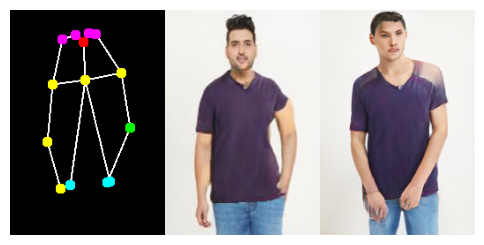

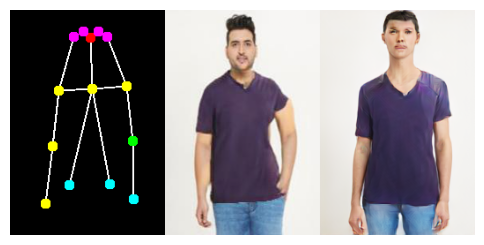

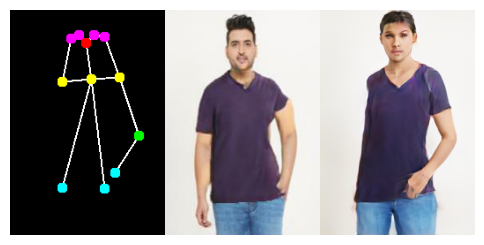

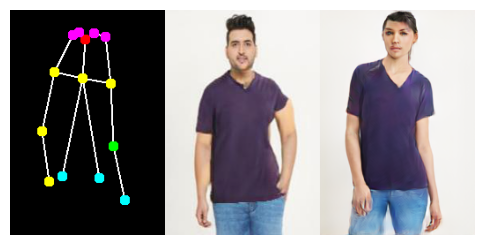

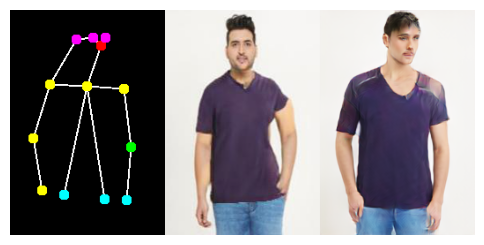

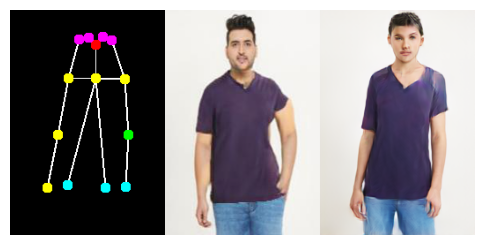

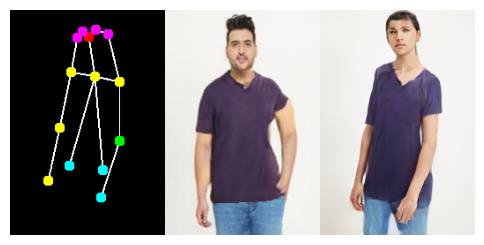

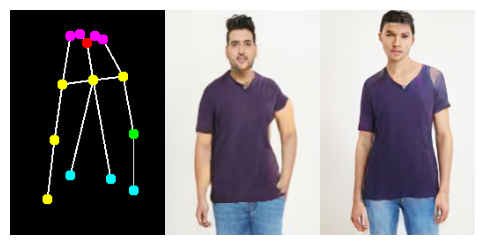

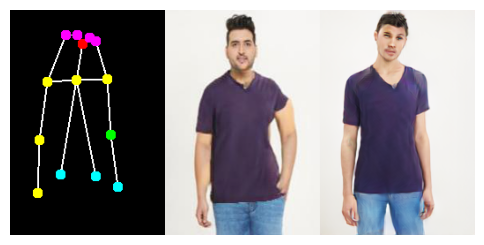

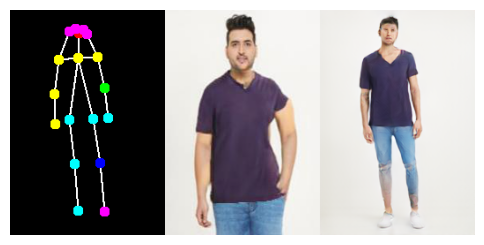

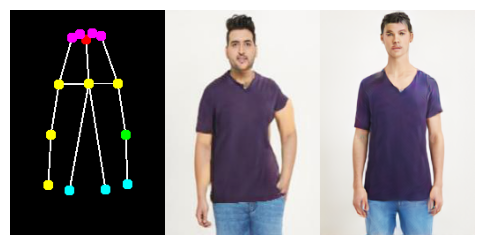

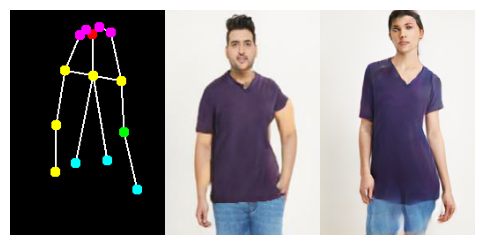

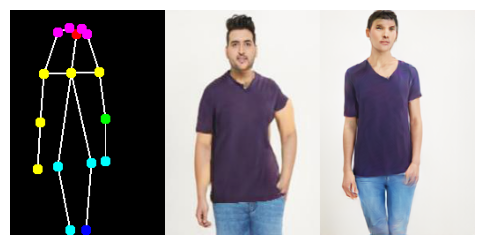

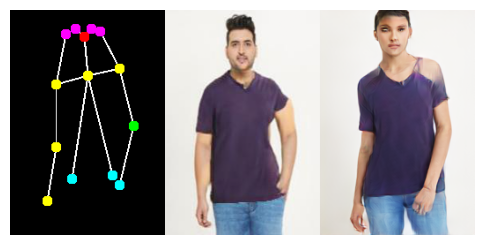

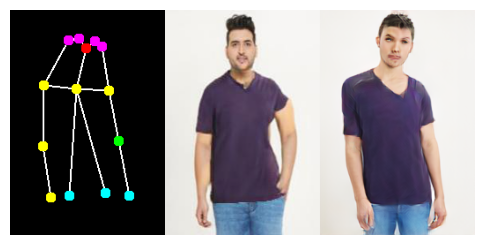

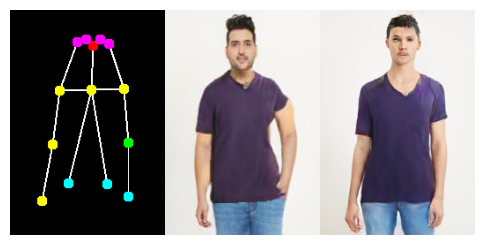

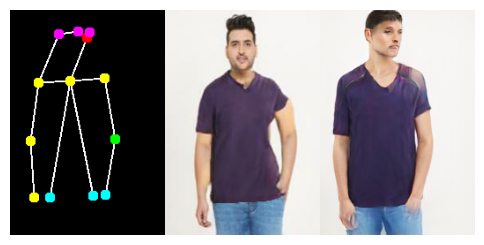

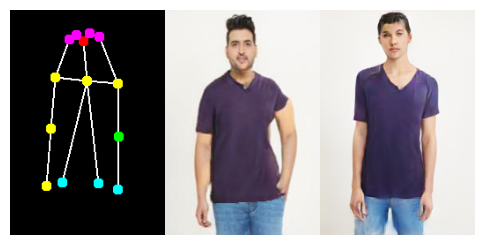

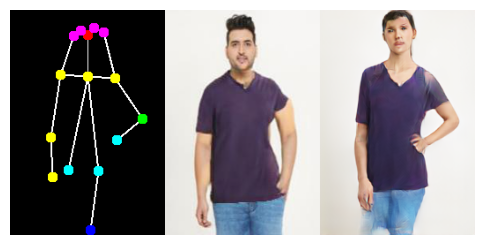

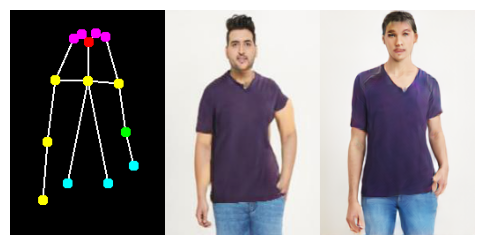

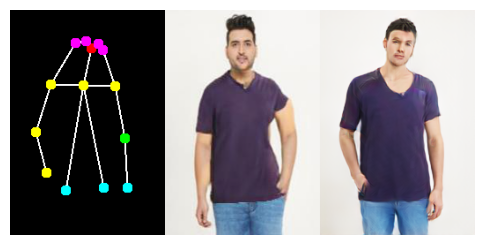

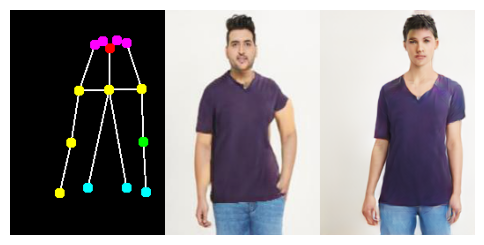

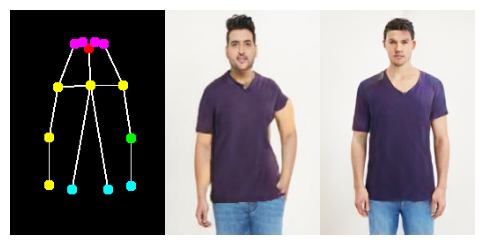

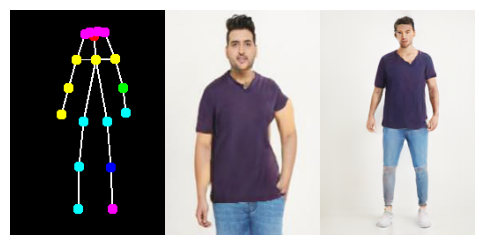

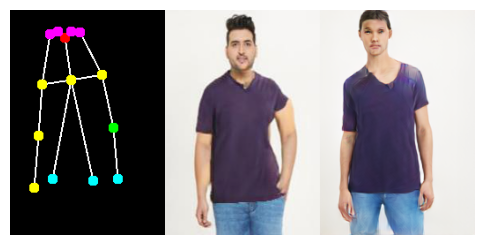

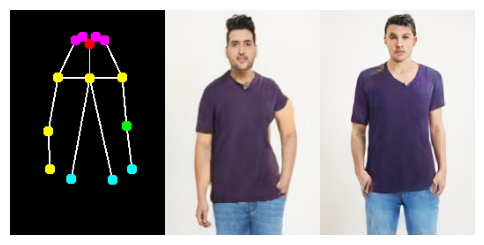

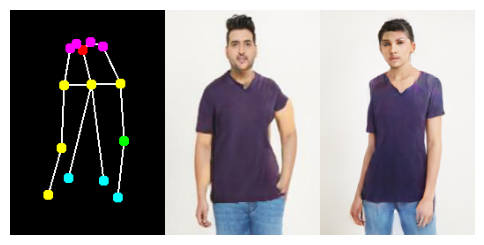

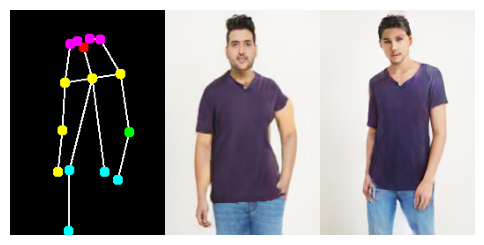

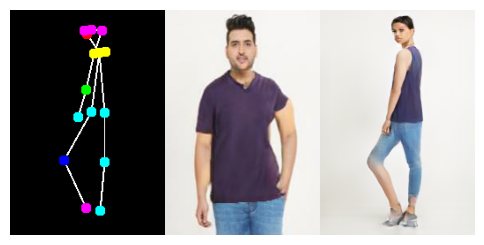

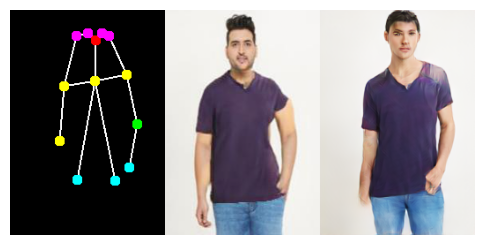

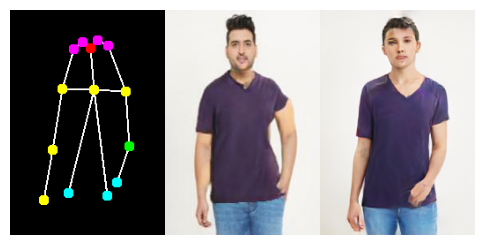

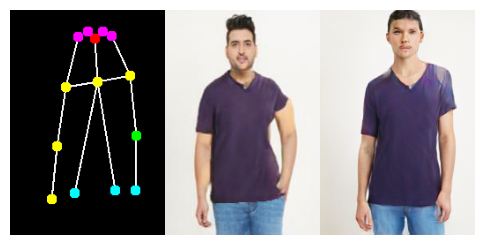

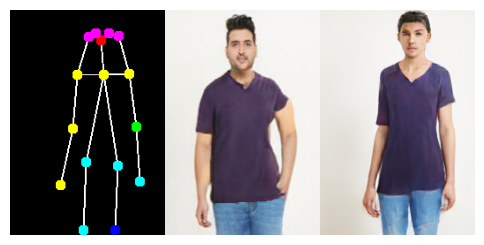

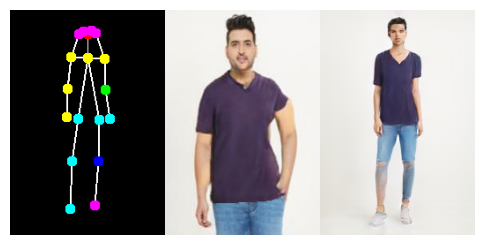

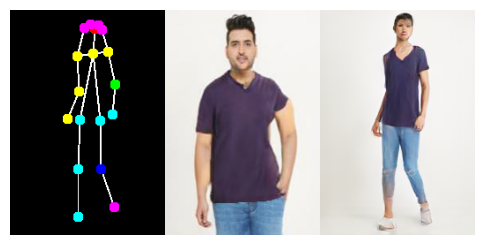

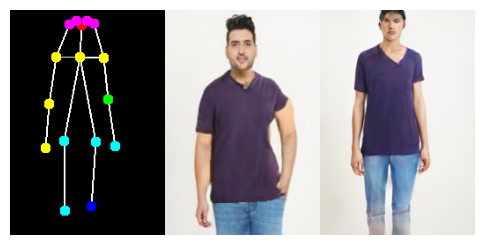

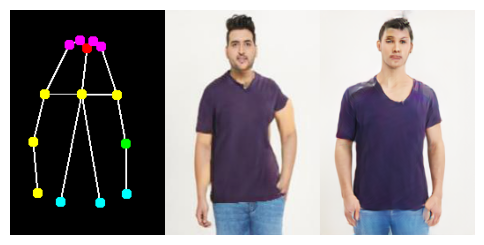

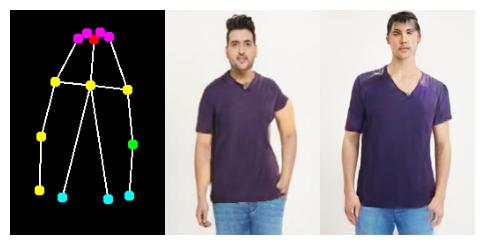

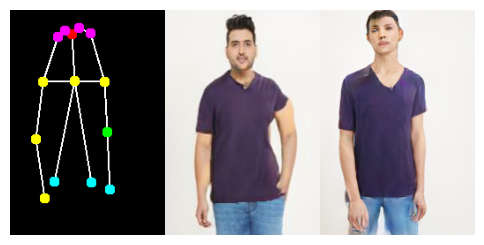

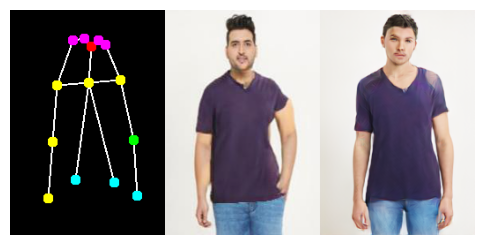

In [ ]:
import numpy as np
%matplotlib notebook
%matplotlib inline
# person id
pid = ("lace", 0, None) 
# pid= ("lace" ,1 , None)
# pid= ("print" ,0 , None)
for i in range(0,4):
  pose_id = ("lace", i, None) 
  pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, pose_id=pose_id)
  plot_img(pimg, gimgs, oimgs, gen_img, pose,"Pose",str(i+1))

for i in range(0,4):
  pose_id = ("plaid", i, None) 
  pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, pose_id=pose_id)
  plot_img(pimg, gimgs, oimgs, gen_img, pose,"Pose",str(i+5))

# pid= ("plaid" ,0, None)

for i in range(0,4):
  pose_id = ("plain", i, None) 
  pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, pose_id=pose_id)
  plot_img(pimg, gimgs, oimgs, gen_img, pose,"Pose",str(i+9))

for i in range(0,4):
  pose_id = ("pattern", i, None) 
  pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, pose_id=pose_id)
  plot_img(pimg, gimgs, oimgs, gen_img, pose,"Pose",str(i+13))

for i in range(0,4):
  pose_id = ("strip", i, None) 
  pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, pose_id=pose_id)
  plot_img(pimg, gimgs, oimgs, gen_img, pose,"Pose",str(i+17))

# pid= ("gfla" ,1 , None)

for i in range(0,4):
  pose_id = ("print", i, None) 
  pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, pose_id=pose_id)
  plot_img(pimg, gimgs, oimgs, gen_img, pose,"Pose",str(i+21))

# pid= ("plain" ,2 , None)

for i in range(0,4):
  pose_id = ("collar", i, None) 
  pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, pose_id=pose_id)
  plot_img(pimg, gimgs, oimgs, gen_img, pose,"Pose",str(i+25))


for i in range(0,4):
  pose_id = ("gfla", i, None) 
  pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, pose_id=pose_id)
  plot_img(pimg, gimgs, oimgs, gen_img, pose,"Pose",str(i+29))

# pid= ("pattern" ,1 , None)

for i in range(0,4):
  pose_id = ("flower", i, None) 
  pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, pose_id=pose_id)
  plot_img(pimg, gimgs, oimgs, gen_img, pose,"Pose",str(i+33))

for i in range(0,4):
  pose_id = ("jacket", i, None) 
  pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, pose_id=pose_id)
  plot_img(pimg, gimgs, oimgs, gen_img, pose,"Pose",str(i+37))



In [ ]:
!zip -r /content/results.zip /content/Results
from google.colab import files
files.download("/content/results.zip")

  adding: content/Results/ (stored 0%)
  adding: content/Results/Pose/ (stored 0%)
  adding: content/Results/Pose/Pose33.png (deflated 2%)
  adding: content/Results/Pose/Pose1.png (deflated 2%)
  adding: content/Results/Pose/Pose34.png (deflated 2%)
  adding: content/Results/Pose/Pose39.png (deflated 2%)
  adding: content/Results/Pose/Pose3.png (deflated 2%)
  adding: content/Results/Pose/Pose14.png (deflated 2%)
  adding: content/Results/Pose/Pose25.png (deflated 2%)
  adding: content/Results/Pose/Pose23.png (deflated 2%)
  adding: content/Results/Pose/Pose30.png (deflated 2%)
  adding: content/Results/Pose/Pose22.png (deflated 2%)
  adding: content/Results/Pose/Pose29.png (deflated 2%)
  adding: content/Results/Pose/Pose27.png (deflated 2%)
  adding: content/Results/Pose/Pose8.png (deflated 2%)
  adding: content/Results/Pose/Pose37.png (deflated 2%)
  adding: content/Results/Pose/Pose19.png (deflated 2%)
  adding: content/Results/Pose/Pose2.png (deflated 2%)
  adding: content/Results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>